# Programming Lesson and Exercises - DAS

The goal of these programming lesson and exercises is to teach you how to filter and aggregate time series data.


This notebook has the following structure:

- The first part introduces the concepts for this week. The theory is interleaved with small exercises, which have the goal of letting you practice the concepts that were just intruduced.
- At the end there are one or more larger exercises, which have the goal to test what you have learned earlier. These will be more difficult and will require more independent work than the exercises in the first part.

All exercises can be solved with the concepts that were introduced earlier. Since there are often more than one correct way to solve a programming problem, we try to accept various correct anwers. However, many of the automatic tests in Momotor (see _How to submit your work_ below) assume that your answers are constructed using the concepts introduced in these notebooks. If you look for answers on the Internet (e.g. if you import other libraries) you run the risk that your answers will be rejected.

Some of the small exercises can be solved by copy-pasting code from the examples. However, it is up to you to try to solve the exercises yourself, which will help you learn, before copy-pasting the answers. The ease of looking up answers is meant to provide guidance when you get stuck, especially for those of you who are new to programming.

For your convenience, in the `support` directory you will find a summary of the Python methods introduced in this notebook.



# Introduction to This Template Notebook

* This is a **personal** notebook.
* Make sure you work in a **copy** of `...-template.ipynb`,
**renamed** to `...-yourIDnr.ipynb`,
where `yourIDnr` is your TU/e identification number.

<div class="alert alert-danger" role="danger">
<h3>Integrity</h3>
<ul>
    <li>In this course you must act according to the rules of the TU/e code of scientific conduct.</li>
    <li>All the exercises and the graded assignments are to be executed individually and independently.</li>
    <li>You must not copy from the Internet, your friends, books... If you represent other people's work as your own, then that constitutes fraud and will be reported to the Examination Committee.</li>
    <li>Making your work available to others (complicity) also constitutes fraud.</li>
</ul>
</div>

You are expected to work with Python code in this notebook.

The locations where you should write your solutions can be recognized by
**marker lines**,
which look like this:

>`#//`
>    `BEGIN_TODO [Label]` `Description` `(n points)`
>
>`#//`
>    `END_TODO [Label]`

<div class="alert alert-warning" role="alert">Do NOT modify or delete these marker lines.  Keep them as they are.<br/>
NEVER write code <i>outside</i> the marked blocks.
Such code cannot be evaluated.
</div>

Proceed in this notebook as follows:
* **Read** the text.
* **Fill in** your solutions between `BEGIN_TODO` and `END_TODO` marker lines.
* **Run** _all_ code cells (also the ones _without_ your code),
    _in linear order_ from the first code cell.

**Personalize your notebook**:
1. Copy the following three lines of code:

  ```python
  AUTHOR_NAME = 'Your Full Name'
  AUTHOR_ID_NR = '1234567'
  AUTHOR_DATE = 'YYYY-MM-DD'
  ```
1. Paste them between the marker lines in the next code cell.
1. Fill in your _full name_, _identification number_, and the current _date_ (i.e. when you first modified this notebook, e.g. '2023-11-01') as strings between the `Author` markers.
1. Run the code cell by putting the cursor there and typing **Control-Enter**.


In [1]:
#// BEGIN_TODO [Author] Name, Id.nr., Date, as strings (1 point)

AUTHOR_NAME = 'Ivan Vasylets'
AUTHOR_ID_NR = '1947400'
AUTHOR_DATE = '2023-12-13'

#// END_TODO [Author]

## Table of Contents

- [Learning Objectives](#Learning-Objectives)
- [Loading the Libraries](#Loading-the-Libraries)
- [1. Filtering](#1.-Filtering)
    - [Gaussian Filter](#Gaussian-Filter)
    - [Rolling Windows](#Rolling-Windows)
    - [Filtering Mouse Trajectories](#Filtering-Mouse-Trajectories)
        - [Exercise 1.a](#Exercise-1.a)
        - [Exercise 1.b](#Exercise-1.b)
        - [Exercise 1.c](#Exercise-1.c)
        - [Exercise 1.d](#Exercise-1.d)
        - [Exercise 1.e](#Exercise-1.e)
    - [Computing Changes and Finding Maxima](#Computing-Changes-and-Finding-Maxima)
        - [Exercise 1.f](#Exercise-1.f)
        - [Exercise 1.g](#Exercise-1.g)
        - [Exercise 1.h](#Exercise-1.h)
    - [Approximating Derivatives and Finding Trends](#Approximating-Derivatives-and-Finding-Trends)
        - [Exercise 1.i](#Exercise-1.i)
- [2. Data Aggregation](#2.-Data-Aggregation)
    - [Data Preparation](#Data-Preparation)
        - [Data: Mouse Trajectories](#Data:-Mouse-Trajectories)
        - [Multi-level Indexing](#Multi-level-Indexing)
        - [Data: User Properties](#Data:-User-Properties)
        - [Conversion to Readable Table Entries](#Conversion-to-Readable-Table-Entries)
        - [Data: User Trial Properties](#Data:-User-Trial-Properties)
            - [Exercise 2.a](#Exercise-2.a)
            - [Exercise 2.b](#Exercise-2.b)
    - [Data Aggregation](#Data-Aggregation)
        - [Computing Several Aggregated Quantities at Once](#Computing-Several-Aggregated-Quantities-at-Once)
        - [Joining Two Dataframes](#Joining-Two-Dataframes)
            - [Exercise 2.c](#Exercise-2.c)
            - [Exercise 2.d](#Exercise-2.d)
- [3. Empirical Cumulative Distribution Functions](#3.-Empirical-Cumulative-Distribution-Functions)
    - [Exercises: Compare ECDFs for Mouse a Trackpad Trajectories](#Exercises:-Compare-ECDFs-for-Mouse-a-Trackpad-Trajectories)
        - [Exercise 3.a](#Exercise-3.a)
        - [Exercise 3.b](#Exercise-3.b)
        - [Exercise 3.c](#Exercise-3.c)
        - [Exercise 3.d](#Exercise-3.d)
        - [Exercise 3.e](#Exercise-3.e)
        - [Exercise 3.f](#Exercise-3.f)
        - [Exercise 3.g](#Exercise-3.g)
- [4. Exercise: Find Ballistic Motion](#4.-Exercise:-Find-Ballistic-Motion)
    - [Exercise 4.a](#Exercise-4.a)
    - [Exercise 4.b](#Exercise-4.b)
    - [Exercise 4.c](#Exercise-4.c)
    - [Exercise 4.d](#Exercise-4.d)
    - [Exercise 4.e](#Exercise-4.e)

## Learning Objectives

In these lessons, we are going to extract features from the mouse trajectories recorded in the mouse experiment. We will first extract features by filtering signals, where a signal represents a quantity that changes with respect to another variable (e.g. time). For this, we will need to learn:

* how to filter signals in _Python_
* how to work with some new _Pandas_ functions

Next, we will extract more features and perform aggregation over the recorded data and will learn

* how to use the _Pandas_ **`agg()`** for convenient aggregation and computation of simple features
* how to combine/join two _Pandas_ tables with the function **`join()`**
* how to compute, use and plot empirical cumulative distribution functions

## Loading the Libraries

To show examples, we load some Data Analytics libraries first:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns                       # also improves the look of plots

# Configure plots
sns.set()                                   # set Seaborn defaults
plt.rcParams['figure.figsize'] = 10, 5      # default hor./vert. size of plots, in inches

from statsmodels.distributions.empirical_distribution import ECDF
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter1d
from scipy import stats

from mouse_experiment import MouseExperiment

# Reveal a hint only while holding the mouse down
from IPython.display import HTML
HTML("<style>.h,.c{display:none}.t{color:#296eaa}.t:active+.h{display:block;}</style>")

## 1. Filtering

To illustrate how to filter signals, we will apply filtering to the (time series in the) _stocks_ data set that we have also seen in the visualization exercises. In the exercises at the end of the notebook, you will apply what you have learned to recorded mouse trajectories.

This time, the _stocks_ data set contains the _daily_ (rather than the monthly) closing value of the <a href="https://en.wikipedia.org/wiki/Nasdaq_Composite">NASDAQ Composite</a> index. We first load the data into a data frame `df_nasdaq`.

In [3]:
df_nasdaq = pd.read_csv('datasets/NASDAQ.csv', parse_dates=[0])
df_nasdaq = df_nasdaq.set_index('Date')[['Close']].rename(columns=str.lower)
df_nasdaq.head()

,close
Date,
2007-01-03,2423.159912
2007-01-04,2453.429932
2007-01-05,2434.250000
2007-01-08,2438.199951
2007-01-09,2443.830078


Let us plot the daily closing index.

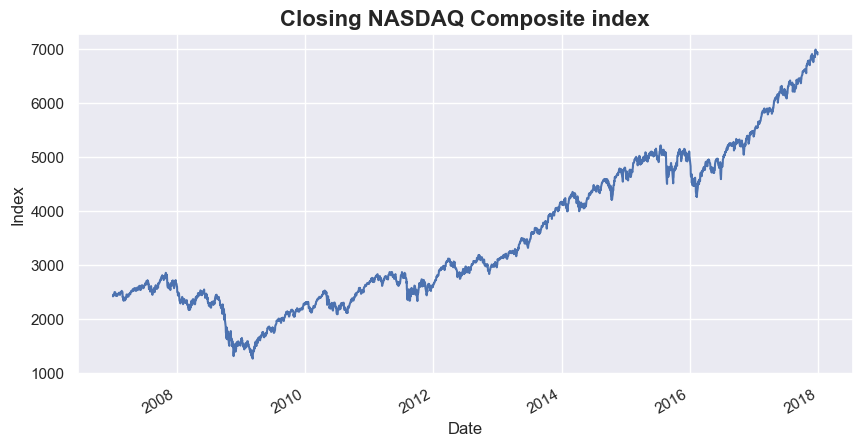

In [4]:
ax = df_nasdaq['close'].plot()
ax.set_ylabel('Index')
ax.set_title('Closing NASDAQ Composite index', size=16, weight='bold');

### Gaussian Filter

As you can see, the closing price is very volatile. If we want to approximate the graph by a curve that is more smooth, we can do so by _filtering_. In this case, we apply a Gaussian filter. We store the filtered data in a column called `'close_filtered'`. The Gaussian filter needs a parameter `sigma`, the standard deviation, which gives an indication of the width of the applied filter. We choose a `sigma` value of `30` (days). 

(There are different ways to deal with the boundaries. We choose the mode `'nearest'`, since for the later exercises it is the most natural choice.)

In [5]:
df_nasdaq['close_filtered'] = gaussian_filter1d(df_nasdaq['close'], sigma=30, mode='nearest')
df_nasdaq.head()

,close,close_filtered
Date,,
2007-01-03,2423.159912,2438.967378
2007-01-04,2453.429932,2439.354293
2007-01-05,2434.250000,2439.740575
2007-01-08,2438.199951,2440.126123
2007-01-09,2443.830078,2440.511070


Let us plot the filtered data together with the original prices in one figure.

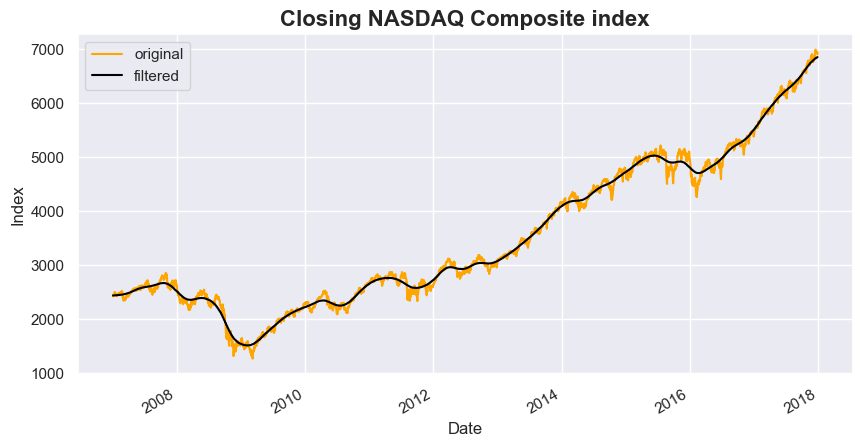

In [6]:
ax_nasdaq = df_nasdaq['close'].plot(color='orange')
df_nasdaq['close_filtered'].plot(color='black', ax=ax_nasdaq)
ax_nasdaq.set_title('Closing NASDAQ Composite index', size=16, weight='bold')
ax_nasdaq.set_ylabel('Index')
ax_nasdaq.legend(['original', 'filtered']);

### Rolling Windows

There are many more ways to filter signals, each with their own advantages and disadvantages. A **median filter** is not so sensitive to outliers as a Gaussian filter.

The Pandas function **`rolling()`** lets you compute rolling window statistics, such as a rolling median. To use it, you need to specify the size of the window. In the following example, we used a window size of `5` (days). You can then apply a statistic to the result: in our median filter example, we calculate the `median`. 

In [7]:
df_nasdaq['median_filtered'] = df_nasdaq['close'].rolling(5).median()
df_nasdaq.head(10)

,close,close_filtered,median_filtered
Date,,,
2007-01-03,2423.159912,2438.967378,NaN
2007-01-04,2453.429932,2439.354293,NaN
2007-01-05,2434.250000,2439.740575,NaN
2007-01-08,2438.199951,2440.126123,NaN
2007-01-09,2443.830078,2440.511070,2438.199951
2007-01-10,2459.330078,2440.895398,2443.830078
2007-01-11,2484.850098,2441.279204,2443.830078
2007-01-12,2502.820068,2441.662644,2459.330078
2007-01-16,2497.780029,2442.045911,2484.850098


In every row of the resulting series, you get the median of the values in the window. If you have a window size of `k`, the result in the `n`th row is the median of the rows `n-k+1`, `n-k+2`, ... up to `n`. Note that for rows `0` to `k-1` the median of the window cannot be computed, resulting in `NaN` values in those rows.

Let us plot the filtered data together with the original prices in one figure.

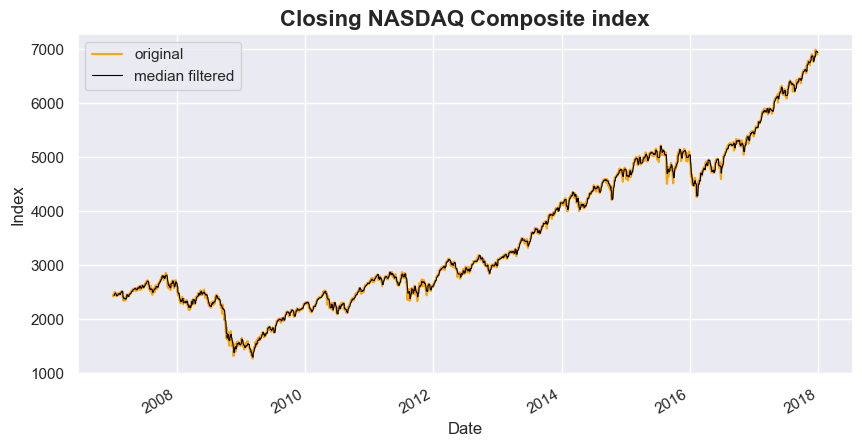

In [8]:
ax_nasdaq = df_nasdaq['close'].plot(color='orange')
df_nasdaq['median_filtered'].plot(color='black', lw=0.8, ax=ax_nasdaq)
ax_nasdaq.set_title('Closing NASDAQ Composite index', size=16, weight='bold')
ax_nasdaq.set_ylabel('Index')
ax_nasdaq.legend(['original', 'median filtered']);

### Filtering Mouse Trajectories

Now we will apply the filtering to recorded mouse trajectories stored in the file `'datasets/paths.csv'`.

In [9]:
df_paths = pd.read_csv('datasets/paths.csv', parse_dates=[0])

<div class="alert-info alert" role="alert-info">

You may also like to experiment on trajectories that you record yourself. The following code will launch the mouse experiment and store the recorded trajectories in the data frame <code>df_paths</code>:

<code>
experiment     = MouseExperiment()
_, df_paths, _ = experiment.start()
</code>

When you execute this code (by uncommenting it in the code cell below) the application will start in a new window. Note, that it may be minimized, in which case you may need to find it in the task bar. Next, draw some trajectories. When you close the window, the trajectories will be stored in the data frame <code>df_paths</code>.

<b>Before you submit your notebook, make sure that your code also works on the trajectories provided in <tt>datasets/paths.csv</tt>.</b>

> <b>Hint:</b> It is easier to understand the exercises if you <b>make a drawing, such as a triangle or a square</b>, instead of drawing straight lines.

</div>

In [10]:
# experiment = MouseExperiment()
# _, df_paths, _ = experiment.start()

We print below the first five rows of `df_paths`.

In [11]:
df_paths.head()

,trial,t,x,y
0,15,0.000000,1,-2
1,15,1.436910,0,-2
2,15,2.017927,-1,-2
3,15,2.370731,-2,-2
4,15,2.411801,-3,-2


> **Note:** We will use the term *trajectory* and *path* interchangeably.

The meaning of the different columns is as follows:

* The **`'trial'`** column contains a unique number per trajectory
* The **`'t'`** column contains contains the time since the start of the trial in ms
* The **`'x'`** column contains the $x$-coordinate on the trajectory at time `'t'` in pixels
* The **`'y'`** column contains the $y$-coordinate on the trajectory at time `'t'` in pixels

We make sure that the `'trial'` column is of integer type, which is needed for the later exercises:

In [12]:
df_paths['trial'] = df_paths['trial'].astype(int)

#### Exercise 1.a

Plot the trajectories obtained from the experiment, i.e. those stored in `df_paths`, in one figure, with both axes ranging from -300 to 300. Recall that different trajectories have a different `'trial'` number.

Here is an example of a possible result for two mouse trajectories:

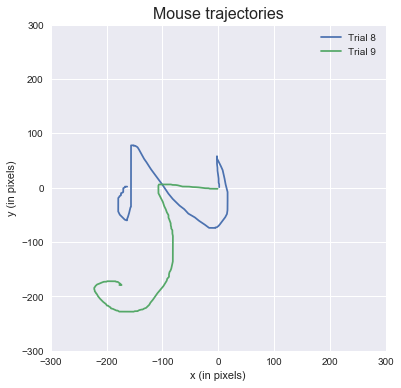

> **Hint:** You can plot two columns labeled `'col_1'` and `'col_2'` from a data frame or a groupby object against each other by providing the arguments `x='col_1'` and `y='col_2'` to the plot function.

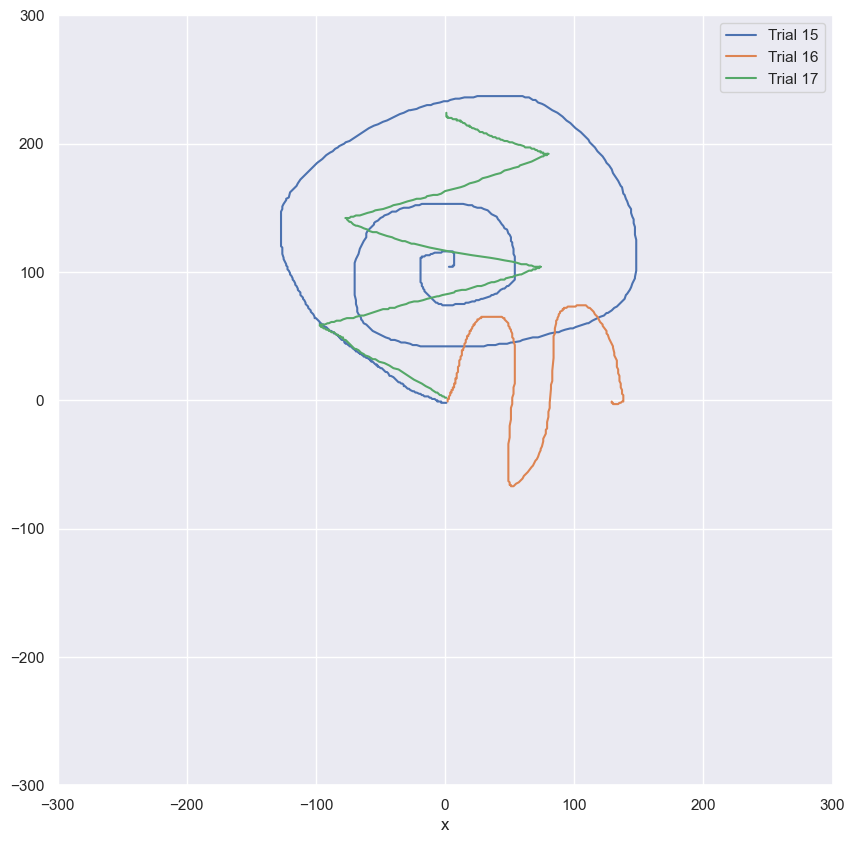

In [88]:
#// BEGIN_TODO [DAS_1a] Visualize the paths (1 point)

fig, ax = plt.subplots(figsize=(10, 10))
df_paths.groupby('trial').plot(x='x', y='y', xlim=[-300, 300], ylim=[-300, 300], ax=ax)
ax.legend(['Trial 15', 'Trial 16', 'Trial 17']);

#// END_TODO [DAS_1a]

#### Exercise 1.b

Select the data from the last recorded trajectory using a boolean mask, and store it in a data frame named `df_last_path`.

> **Hint:** The `'trial'` numbers are increasing, i.e., later trajectories have larger `'trial'` numbers.

In [14]:
#// BEGIN_TODO [DAS_1b] Select data (1 point)

df_last_path = df_paths[df_paths['trial'] == df_paths['trial'].max()].copy()

#// END_TODO [DAS_1b]

df_last_path.head()

,trial,t,x,y
885,17,0.000000,1,2
886,17,0.771446,0,2
887,17,0.779367,-1,3
888,17,0.787307,-2,3
889,17,0.795360,-3,4


#### Exercise 1.c

Plot the last recorded trajectory, which is now stored in the `df_last_path` data frame. Set the limits of both axes from -300 to 300.

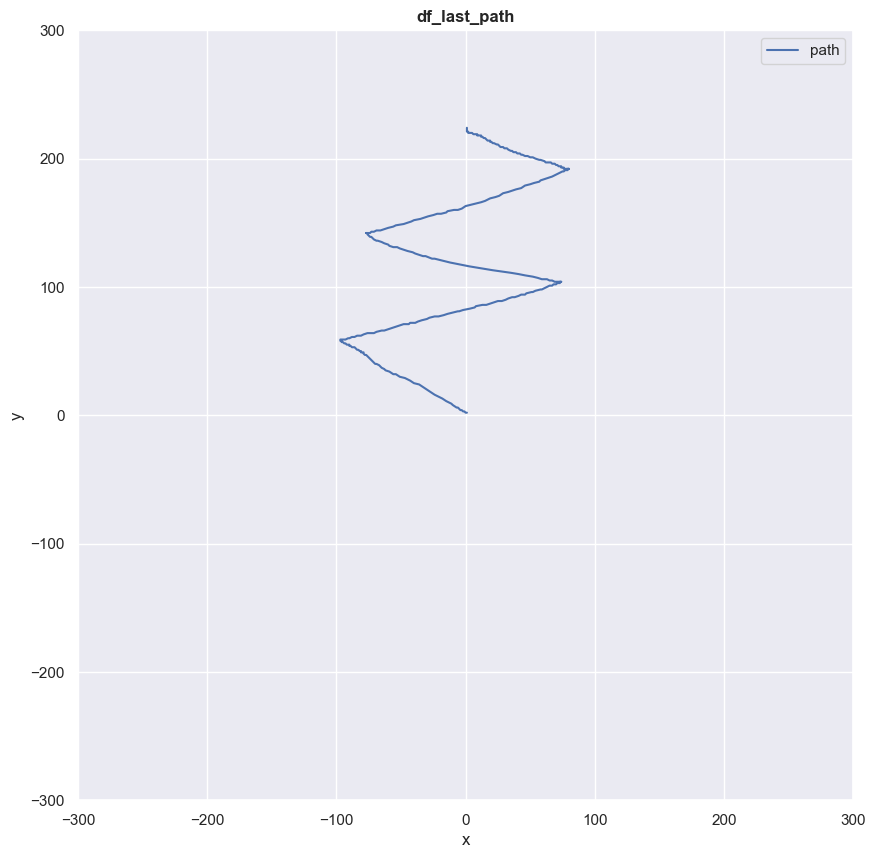

In [15]:
#// BEGIN_TODO [DAS_1c] Select data (1 point)

df_last_path.plot(x='x', y='y', xlim=[-300, 300], ylim=[-300, 300], figsize=(10, 10));
plt.title('df_last_path', weight='bold')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['path']);

#// END_TODO [DAS_1c]

> **Hint:** After doing this exercise, go back and record some new mouse trajectories. Then, execute the code that you wrote for the previous exercises again, **without modifying it**. It should select the trajectory that you drew last.

#### Exercise 1.d

Use a Gaussian filter with a standard deviation of $25$ ms, to approximate the $x$- and $y$-coordinates of the trajectory in `df_last_path`. Store the $x$- and $y$-coordinates of the filtered path in columns labeled `'filt_x'` and `'filt_y'` respectively (in `df_last_path`). Then use a Gaussian filter with standard deviation of $200$ ms, and store the filtered path in columns labeled `'filt_x_coarse'` and `'filt_y_coarse'`.

Finally, plot the original and the two filtered paths in one figure, with both axes ranging from -300 to 300.

> <span class="t">**Hint<span class="c">:**</span></span>
<span class="h">
Consider setting the `figsize` argument of the `plot()` function to something larger (e.g. `figsize=(10, 10)`) make it easier to spot the differences between the filtering options.
</span>

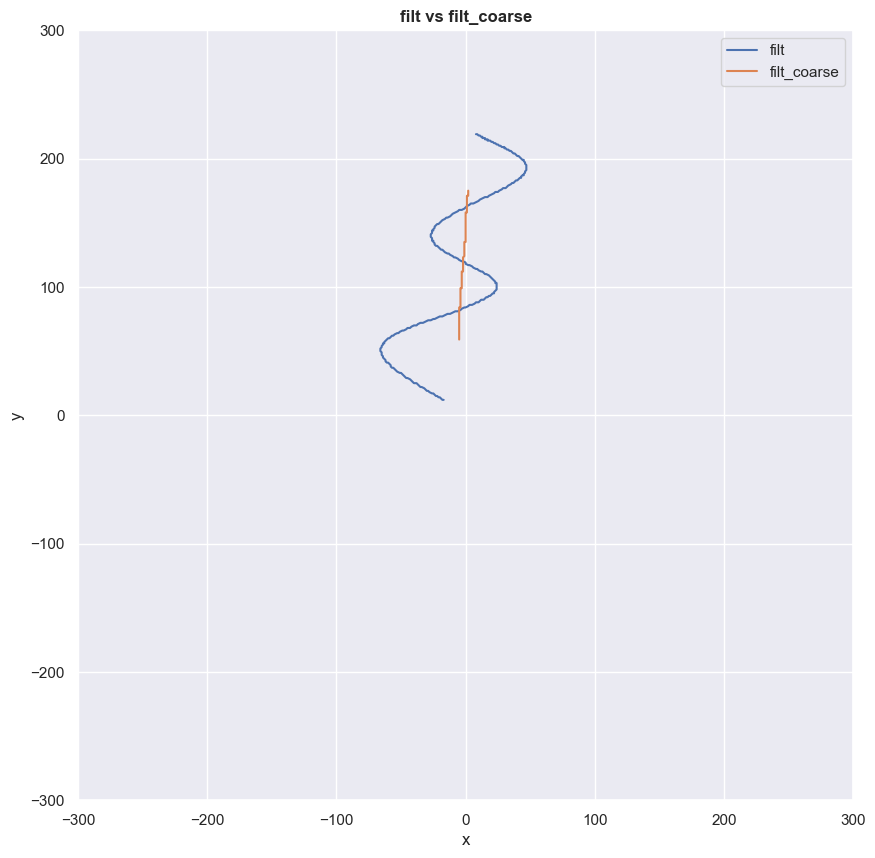

In [16]:
#// BEGIN_TODO [DAS_1d] Gaussian filter (1 point)

df_last_path['filt_x'] = gaussian_filter1d(df_last_path['x'], sigma=25, mode='nearest')
df_last_path['filt_y'] = gaussian_filter1d(df_last_path['y'], sigma=25, mode='nearest')
df_last_path['filt_x_coarse'] = gaussian_filter1d(df_last_path['x'], sigma=200, mode='nearest')
df_last_path['filt_y_coarse'] = gaussian_filter1d(df_last_path['y'], sigma=200, mode='nearest')

ax = df_last_path.plot(x='filt_x', y='filt_y', xlim=[-300,300], ylim=[-300, 300], figsize=(10,10))
df_last_path.plot(x='filt_x_coarse', y='filt_y_coarse', ax=ax)

ax.set_title('filt vs filt_coarse', weight='bold')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(['filt', 'filt_coarse']);

In [17]:
#// END_TODO [DAS_1d]

Which filtered trajectory approximates the original curve best?

#### Exercise 1.e

Now use a median filter, with a window size of `80` to approximate the $x$- and $y$-coordinates of the trajectory in `df_last_path`. Store the $x$- and $y$-coordinates of the filtered path in columns labeled `'med_filt_x'` and `'med_filt_y'` respectively. Similarly, use a median filter with a window size of `200` and store the coordinates of the filtered path as columns `'med_filt_x_coarse'` and `'med_filt_y_coarse'`. 

Finally, plot the original and the two filtered paths in one figure, with both axes ranging from -300 to 300.

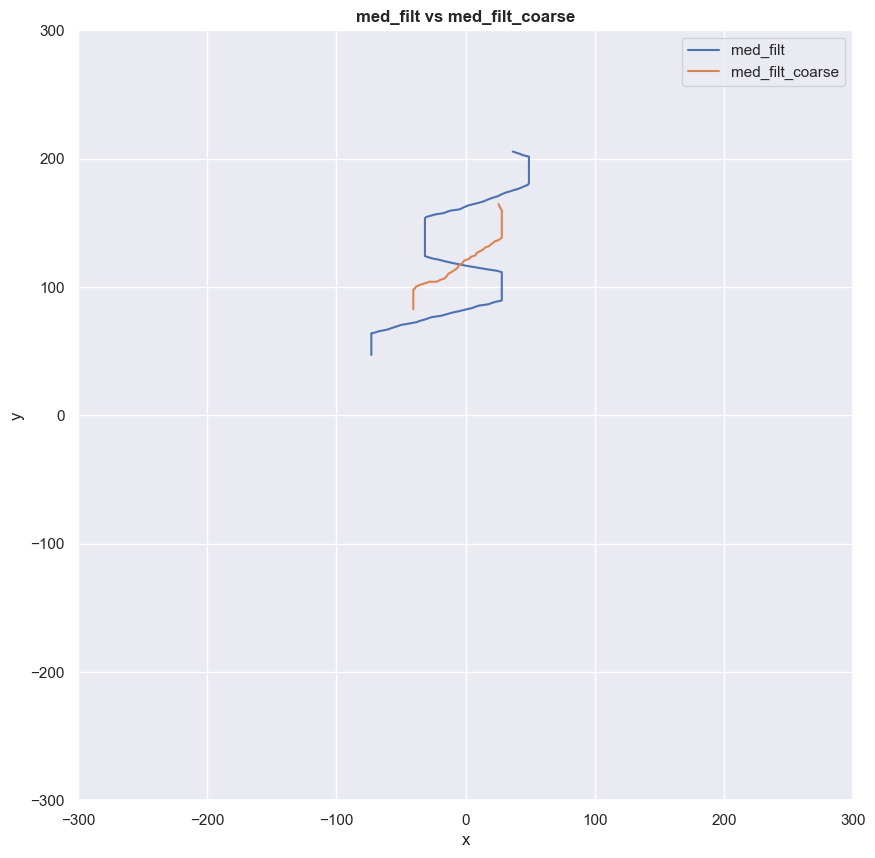

In [18]:
#// BEGIN_TODO [DAS_1e] Median filter (1 point)

df_last_path['med_filt_x'] = df_last_path['x'].rolling(80).median()
df_last_path['med_filt_y'] = df_last_path['y'].rolling(80).median()
df_last_path['med_filt_x_coarse'] = df_last_path['x'].rolling(200).median()
df_last_path['med_filt_y_coarse'] = df_last_path['y'].rolling(200).median()

ax = df_last_path.plot(x='med_filt_x', y='med_filt_y', xlim=[-300,300], ylim=[-300, 300], figsize=(10,10))
df_last_path.plot(x='med_filt_x_coarse', y='med_filt_y_coarse', ax=ax);
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_title('med_filt vs med_filt_coarse', weight='bold')
ax.legend(['med_filt', 'med_filt_coarse']);

#// END_TODO [DAS_1e]

What differences do you see when compared to the Gaussian-filtered trajectories? You can experiment by drawing different trajectories.

### Computing Changes and Finding Maxima

We will now introduce several new _Pandas_ functions. To illustrate their use, we consider the following example question:

_At what day did the biggest drop in the NASDAQ Composite index occur?_

We approach this as follows. First, we calculate the differences between consecutive rows in a _Series_ with the _Pandas_ function **`diff()`**. We use it to add a new column, labeled `'close_diff'`, to the data frame `df_nasdaq`.

In [19]:
df_nasdaq['close_diff'] = df_nasdaq['close'].diff()
df_nasdaq[['close', 'close_diff']].head()

,close,close_diff
Date,,
2007-01-03,2423.159912,NaN
2007-01-04,2453.429932,30.270020
2007-01-05,2434.250000,-19.179932
2007-01-08,2438.199951,3.949951
2007-01-09,2443.830078,5.630127


For all rows, except the first, you can check that the value in the `'close_diff'` column equals the value in the `'close'` column in the same row, minus the value in the `'close'` column in the previous row. In the first row, you see a `NaN`, because _Pandas_ cannot calculate the difference between the first row and the row before that, because the latter does not exist.

Next, we want to know at which date the drop of NASDAQ Composite was the largest. In other words, we are interested for which `'Date'`, the change in closing value was the smallest (i.e. the most negative). We can find this date with the Pandas function **`idxmin()`**.

In [20]:
date_min = df_nasdaq['close_diff'].idxmin()
date_min

Timestamp('2016-06-24 00:00:00')

Apparently, the value drop was the largest on the 24th of June in 2016. Let us see what the drop actually was.

In [21]:
df_nasdaq.loc[date_min, 'close_diff']

-202.06005900000036

Similarly, we can find the date with the largest increase of NASDAQ Composite by using the Pandas function **`idxmax()`**.

In [22]:
date_max = df_nasdaq['close_diff'].idxmax()
date_max

Timestamp('2008-10-13 00:00:00')

If we sum all the differences up to a particular row starting from some initial row, we should get back the difference between the value in that row and the value in the initial row. We can compute such a _cumulative sum_ with the _Pandas_ function **`cumsum()`**. We add the column with cumulative sums to the data frame as a new column labeled `'close_diff_cumulative'`. We also add a column labeled `'change_since_beginning'` in which we manually calculate the difference between the current value and the first value. The last two columns should then have the same values.

In [23]:
df_nasdaq['close_diff_cumulative'] = df_nasdaq['close_diff'].cumsum()
df_nasdaq['change_since_beginning'] = df_nasdaq['close'] - df_nasdaq['close'].iloc[0]
df_nasdaq[['close', 'close_diff', 'close_diff_cumulative', 'change_since_beginning']].head()

,close,close_diff,close_diff_cumulative,change_since_beginning
Date,,,,
2007-01-03,2423.159912,NaN,NaN,0.000000
2007-01-04,2453.429932,30.270020,30.270020,30.270020
2007-01-05,2434.250000,-19.179932,11.090088,11.090088
2007-01-08,2438.199951,3.949951,15.040039,15.040039
2007-01-09,2443.830078,5.630127,20.670166,20.670166


The values in the last two columns indeed coincide (except for the first row due to the `NaN`s). Note that we used `.iloc[0]` to retrieve the first row of `df_nasdaq`, which is equivalent to `.loc[df_nasdaq.index[0]]`.

To get an impression of how volatile the NASDAQ Composite is, we may also be interested in the total absolute change up to a particular date. To get the absolute change from `'close_diff'` we could use the _Pandas_ function `abs()`. However, for the later exercises it is instructive if we demonstrate an alternative method.

In [24]:
df_nasdaq['abs_change'] = (df_nasdaq['close_diff'] ** 2) ** (1 / 2)
df_nasdaq['total_abs_change'] = df_nasdaq['abs_change'].cumsum()
df_nasdaq[['close', 'close_diff', 'abs_change', 'total_abs_change']].tail()

,close,close_diff,abs_change,total_abs_change
Date,,,,
2017-12-22,6959.959961,-5.399902,5.399902,76266.365519
2017-12-26,6936.250000,-23.709961,23.709961,76290.075480
2017-12-27,6939.339844,3.089844,3.089844,76293.165324
2017-12-28,6950.160156,10.820312,10.820312,76303.985636
2017-12-29,6903.390137,-46.770019,46.770019,76350.755655


Note that we used `.tail()` to show the last 5 rows of the data frame.

#### Exercise 1.f

Add a new column to the data frame `df_last_path`, with the label `'segment_length'`, containing in every row the length of the line segment between the **unfiltered** $(x,y)$-coordinates of the current row and the previous row. In the first row, manually set the value of `'segment_length'` to `0`.

> **Hint:** The first row in a data frame `df` is not necessarily the one at index = 0, but rather the one at index = `df.index[0]`.

In [25]:
#// BEGIN_TODO [DAS_1f] Lengths of line segments (1 point)

df_last_path['segment_length'] = (df_last_path['x'].diff() ** 2 + df_last_path['y'].diff() ** 2) ** (1/2)
df_last_path.loc[df_last_path.index[0]] = 0

#// END_TODO [DAS_1f]

df_last_path.head()

,trial,t,x,y,filt_x,filt_y,filt_x_coarse,filt_y_coarse,med_filt_x,med_filt_y,med_filt_x_coarse,med_filt_y_coarse,segment_length
885,0,0.000000,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.000000
886,17,0.771446,0,2,-18,12,-5,59,NaN,NaN,NaN,NaN,1.000000
887,17,0.779367,-1,3,-19,13,-5,60,NaN,NaN,NaN,NaN,1.414214
888,17,0.787307,-2,3,-20,14,-5,60,NaN,NaN,NaN,NaN,1.000000
889,17,0.795360,-3,4,-21,14,-5,60,NaN,NaN,NaN,NaN,1.414214


#### Exercise 1.g

Find the index in `df_last_path` of the first row in which the `'segment_length'` was longest. Assign your answer to the variable `i_longest_segment`.

In [26]:
#// BEGIN_TODO [DAS_1g] Longest segment (1 point)

i_longest_segment = df_last_path['segment_length'].idxmax()

#// END_TODO [DAS_1g]

i_longest_segment

1033

#### Exercise 1.h

Add a new column named `'path_length'` to `df_last_path`, containing in every row the cumulative sum of the line segments so far.

In [27]:
#// BEGIN_TODO [DAS_1h] Compute path length (1 point)

df_last_path['path_length'] = df_last_path['segment_length'].cumsum()

#// END_TODO [DAS_1h]

df_last_path.head()

,trial,t,x,y,filt_x,filt_y,filt_x_coarse,filt_y_coarse,med_filt_x,med_filt_y,med_filt_x_coarse,med_filt_y_coarse,segment_length,path_length
885,0,0.000000,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000
886,17,0.771446,0,2,-18,12,-5,59,NaN,NaN,NaN,NaN,1.000000,1.000000
887,17,0.779367,-1,3,-19,13,-5,60,NaN,NaN,NaN,NaN,1.414214,2.414214
888,17,0.787307,-2,3,-20,14,-5,60,NaN,NaN,NaN,NaN,1.000000,3.414214
889,17,0.795360,-3,4,-21,14,-5,60,NaN,NaN,NaN,NaN,1.414214,4.828427


The next step will be to estimate the speed of the trajectory at any given moment. For this, we need to know more about how to approximate derivatives.

### Approximating Derivatives and Finding Trends

Suppose now that we are interested in finding some trends in the stock data. For instance, we want to find periods in which the NASDAQ index was generally increasing and periods in which it was decreasing. We could try to plot the differences between consecutive days in closing prices, but this signal is so volatile that it is impossible to discern any clear pattern:

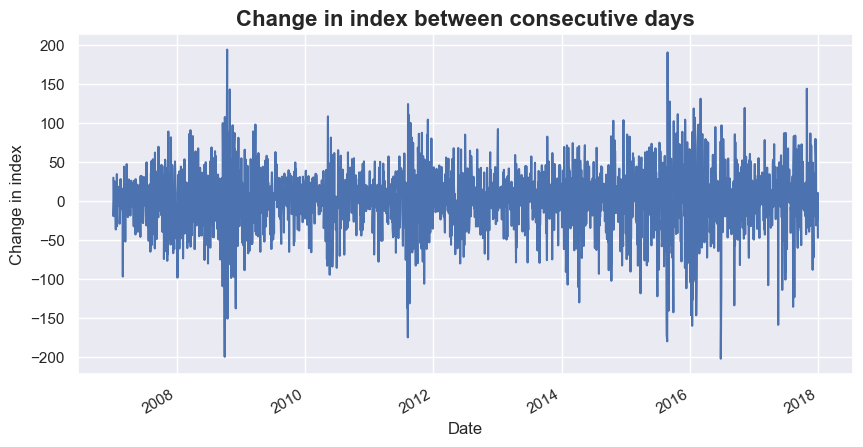

In [28]:
ax_marg = df_nasdaq['close_diff'].plot()
ax_marg.set_ylabel('Change in index')
ax_marg.set_title('Change in index between consecutive days', size=16, weight='bold');

You can use filtering to find an averaged numerical derivative of the signal over a certain time window. For this, we apply a higher-order Gaussian filter to the original time signal. We indicate that we want a first-order filter by specifying the keyword argument `order=1`. (In general, `order=n` gives an approximation of the `n`th derivatives. The default value is `order=0`, which just gives an approximation to the original function.) We choose a standard deviation `sigma=30` for the Gaussian filter to average the derivatives over a time period of approximately a month.

In [29]:
df_nasdaq['close_filtered_deriv'] = gaussian_filter1d(df_nasdaq['close'], sigma=30, order=1, mode='nearest')
df_nasdaq.head()

,close,close_filtered,median_filtered,close_diff,close_diff_cumulative,change_since_beginning,abs_change,total_abs_change,close_filtered_deriv
Date,,,,,,,,,
2007-01-03,2423.159912,2438.967378,NaN,NaN,NaN,0.000000,NaN,NaN,0.386445
2007-01-04,2453.429932,2439.354293,NaN,30.270020,30.270020,30.270020,30.270020,30.270020,0.385847
2007-01-05,2434.250000,2439.740575,NaN,-19.179932,11.090088,11.090088,19.179932,49.449952,0.385161
2007-01-08,2438.199951,2440.126123,NaN,3.949951,15.040039,15.040039,3.949951,53.399903,0.384430
2007-01-09,2443.830078,2440.511070,2438.199951,5.630127,20.670166,20.670166,5.630127,59.030030,0.383726


We visualize the approximate derivative in the graph below.

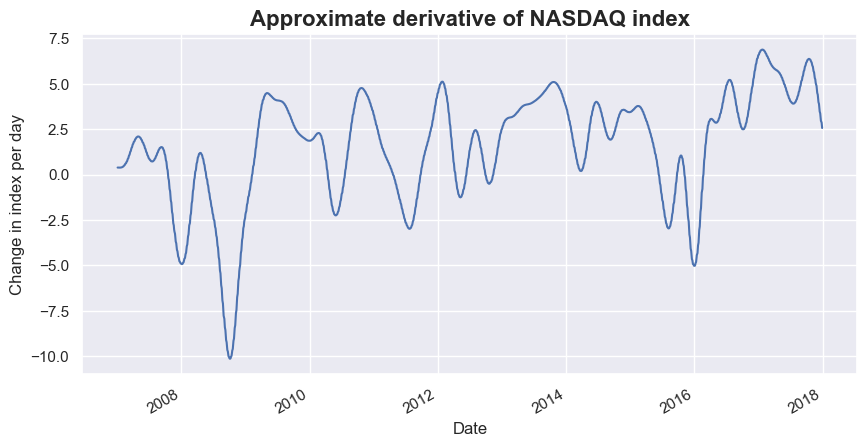

In [30]:
ax_deriv = df_nasdaq['close_filtered_deriv'].plot()
ax_deriv.set_title('Approximate derivative of NASDAQ index', size=16, weight='bold')
ax_deriv.set_ylabel('Change in index per day');

#### Exercise 1.i

Approximate the _speed_ (in pixels per ms) of the trajectory in `df_last_path` by applying a Gaussian filter of order $1$ to the path length. Store the result in a column `'approximate_speed'`. Use a standard deviation of $25$ ms.
Plot this approximate speed of the mouse trajectory over time.

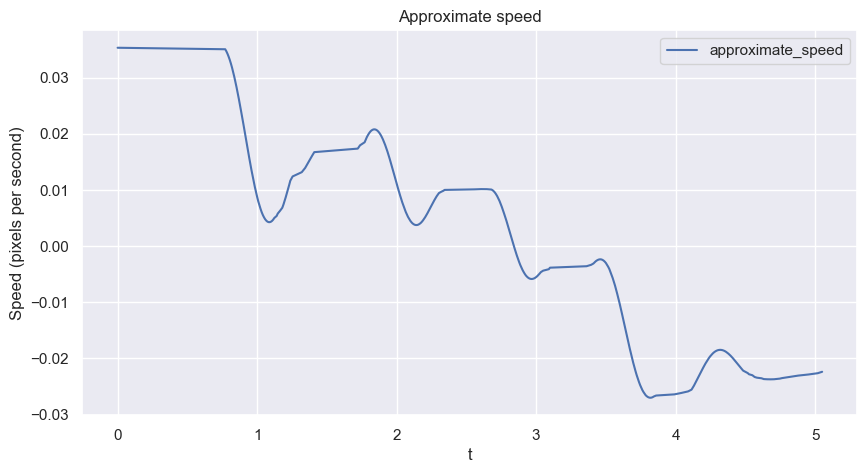

In [31]:
#// BEGIN_TODO [DAS_1i] Compute approximate speed (1 point)

df_last_path['approximate_speed'] = gaussian_filter1d(df_last_path['segment_length'], sigma=25, order=1, mode='nearest')
df_last_path.plot(x='t', y='approximate_speed')
plt.title('Approximate speed')
plt.ylabel('Speed (pixels per second)');
#// END_TODO [DAS_1i]

## 2. Data Aggregation

In this section, we will compute more features of the data and (re)introduce some very powerful _Pandas_ techniques:

* **Multi-level indexing**
* **Advanced data aggregation** with the function **`agg()`**
* **Joining** two data frames with the function **`join()`**
* **Applying** a function, Series or dictionary to another Series with the function **`map()`**

Some of these techniques were already included in previous exercise sets, but we revisit them here for convenience. Master them, and you will be a truly skilled _Pandas_ user.

We work with the mouse trajectory data that was collected during the mouse experiment, which we load and prepare first. 

## Data Preparation

### Data: Mouse Trajectories

The actual trajectories are stored in `'datasets/fitts.csv'`, which we read into the data frame `df_fitts`. To create this file, we have processed recorded trajectories as in the previous section.

In [32]:
df_fitts = pd.read_csv('datasets/fitts.csv')
df_fitts.head()

,user,trial,t,x,y,path_length,approximate_speed
0,1164,5,0.00,-2.0,1.000000,0.000000,0.001584
1,1164,5,0.02,-2.0,0.936582,0.063418,0.002497
2,1164,5,0.04,-2.0,0.873164,0.126836,0.002995
3,1164,5,0.06,-2.0,0.809747,0.190253,0.003142
4,1164,5,0.08,-2.0,0.746329,0.253671,0.003166


The data frame is very similar to the one of the previous section. The biggest difference is that it contains paths recorded by more than one user. Each user is assigned a unique number, which is stored in the **`'user'`** column.

### Multi-level Indexing

Every row is _uniquely_ identified by the **triple** of values in the `'user'`, `'trial'` and `'t'` column. The combination of this triple would make for an ideal index for the data frame. Such an index that is made out of multiple components is called a **multi-level index** (sometimes called a hierarchical index or MultiIndex). We make the triple of columns `'user'`, `'trial'` and `'t'` into a multi-level index, by providing their names as a list to the `set_index()` function. 

In [33]:
df_fitts.set_index(['user', 'trial', 't'], inplace=True)
df_fitts.head()

x         y  path_length  approximate_speed
user trial t                                                  
1164 5     0.00 -2.0  1.000000     0.000000           0.001584
           0.02 -2.0  0.936582     0.063418           0.002497
           0.04 -2.0  0.873164     0.126836           0.002995
           0.06 -2.0  0.809747     0.190253           0.003142
           0.08 -2.0  0.746329     0.253671           0.003166

Rows can be retrieved from a data frame with a multi-level index by supplying a value for all the index components to `.loc[]`. For example, the following will return the third row in the above data frame:

In [34]:
df_fitts.loc[1164, 5, 0.04]

x                   -2.000000
y                    0.873164
path_length          0.126836
approximate_speed    0.002995
Name: (1164, 5, 0.04), dtype: float64

In the remainder of this notebook, we will use multi-level indexes mainly for joining data frames.

### Data: User Properties

The file `'datasets/user_props.csv'` contains settings that are constant for each user. It contains a table with the following columns:

* **`'user'`**: an integer number identifying each user;
* **`'use_tue_laptop'`**: whether the user used a TU/e laptop;
* **`'right_handed'`**: whether the user is right-handed or not;
* **`'platform'`**: the operating system of the user;
* **`'platform_version'`**: the version of the operating system of the user.

We load it into the data frame `df_user_props`.

In [35]:
df_user_props = pd.read_csv('datasets/user_props.csv')
df_user_props.head()

,user,use_tue_laptop,right_handed,platform,platform_version
0,1,1,1,Windows,10
1,2,1,1,Windows,10
2,4,1,1,Windows,10
3,6,1,1,Windows,10
4,7,1,1,Windows,10


Every row in this table is uniquely identified by the integer in the `'user'` column. Therefore, we set this column as the index of the data frame.

In [36]:
df_user_props.set_index('user', inplace=True)
df_user_props.head()

,use_tue_laptop,right_handed,platform,platform_version
user,,,,
1,1,1,Windows,10
2,1,1,Windows,10
4,1,1,Windows,10
6,1,1,Windows,10
7,1,1,Windows,10


### Conversion to Readable Table Entries

Two of the columns of `df_user_props` contain integers that do not have a clear meaning. The interpretation of these integers is encoded by the following dictionaries.

In [37]:
dict_use_tue_laptop = {0: False, 1: True}
dict_right_handed = {0: False, 1: True}

We can use these dictionaries to create more readable columns. But first there is a technical point that the values in for instance the column `'use_tue_laptop'` may be floats and not integers. So to make sure we can use the `dict_use_tue_laptop` dictionary, we have to cast this column to integer type.

In [38]:
df_user_props['use_tue_laptop'] = df_user_props['use_tue_laptop'].astype(int)

#### The _Pandas_ Function **`map()`**

We can now use the _Pandas_ function **`map()`** with the argument `dict_use_tue_laptop` to map every `0` to a `False` and every `1` to a `True`.

In [39]:
df_user_props['use_tue_laptop'] = df_user_props['use_tue_laptop'].map(dict_use_tue_laptop)
df_user_props.head()

,use_tue_laptop,right_handed,platform,platform_version
user,,,,
1,True,1,Windows,10
2,True,1,Windows,10
4,True,1,Windows,10
6,True,1,Windows,10
7,True,1,Windows,10


### Data: User Trial Properties

The file `'datasets/user_trial_props.csv'` contains settings that are specific to each user trial. It contains a table with the following columns:

* **`'user'`**: an integer that identifies the user who drew the trajectory;
* **`'trial'`**: an integer that identifies the trajectory;
* **`'delay'`**: the time in seconds between the user moving the mouse on the red square in the origin and the target appearing;
* **`'input_method'`**: whether the user used a trackpad or a mouse;
* **`'target_radius'`**: the radius of the target in pixels;
* **`'target_x'`**: the $x$-coordinate of the target in pixels;
* **`'target_y'`**: the $y$-coordinate of the target in pixels;
* **`'total_time'`**: the total time of the trial in seconds.

The pair of `'user'` and `'trial'` identify a trajectory uniquely.

The meaning of the values in the `'input_method'` columns is encoded by the following dictionary.

In [40]:
dict_input_method = {0: 'trackpad', 1: 'mouse'}

We read those properties into the data frame `df_user_trial_props`.

In [41]:
df_user_trial_props = pd.read_csv('datasets/user_trial_props.csv')
df_user_trial_props.head()

,user,trial,delay,input_method,target_radius,target_x,target_y,total_time
0,1226,5,2.136719,0,6,-84,-84,3.607323
1,1226,6,3.540913,0,6,0,190,1.867664
2,1226,7,3.688381,0,6,-158,-158,1.645011
3,1226,8,2.823134,0,3,81,-81,1.776010
4,1226,9,3.690253,0,9,-157,157,1.567794


Each row in the data frame `df_user_trial_props` is uniquely determined by the pair of values in the `'user'` and `'trial'` column. This pair of values would therefore make for an ideal **multi-level index** of the data frame.

#### Exercise 2.a

Set the index of the data frame `df_user_trial_props` to a multi-level index consisting of the `'user'` and `'trial'` columns.

In [42]:
#// BEGIN_TODO [DAS_2a] Multi-level index (1 point)

df_user_trial_props.set_index(['user', 'trial'], inplace=True)

#// END_TODO [DAS_2a]

df_user_trial_props.head()

delay  input_method  target_radius  target_x  target_y  \
user trial                                                              
1226 5      2.136719             0              6       -84       -84   
     6      3.540913             0              6         0       190   
     7      3.688381             0              6      -158      -158   
     8      2.823134             0              3        81       -81   
     9      3.690253             0              9      -157       157   

            total_time  
user trial              
1226 5        3.607323  
     6        1.867664  
     7        1.645011  
     8        1.776010  
     9        1.567794

#### Exercise 2.b

Use the dictionary `dict_right_handed` to convert the data in the column `'right_handed'` in `df_user_props` to more readable values. Similarly, use the dictionary `dict_input_method` to convert the data in the column `'input_method'` in the data frame `df_user_trial_props` to more readable values.

In [43]:
#// BEGIN_TODO [DAS_2b] Convert columns in data frames (1 point)

df_user_props['right_handed'] = df_user_props['right_handed'].map(dict_right_handed)
df_user_trial_props['input_method'] = df_user_trial_props['input_method'].map(dict_input_method)

#// END_TODO [DAS_2b]

df_user_props.head()

,use_tue_laptop,right_handed,platform,platform_version
user,,,,
1,True,True,Windows,10
2,True,True,Windows,10
4,True,True,Windows,10
6,True,True,Windows,10
7,True,True,Windows,10


In [44]:
df_user_trial_props.head()

delay input_method  target_radius  target_x  target_y  \
user trial                                                             
1226 5      2.136719     trackpad              6       -84       -84   
     6      3.540913     trackpad              6         0       190   
     7      3.688381     trackpad              6      -158      -158   
     8      2.823134     trackpad              3        81       -81   
     9      3.690253     trackpad              9      -157       157   

            total_time  
user trial              
1226 5        3.607323  
     6        1.867664  
     7        1.645011  
     8        1.776010  
     9        1.567794

## Data Aggregation

In the EDA exercises you have already encountered various ways to aggregate data. One very useful method was to _group_ the data. For instance, if we want to compute the average approximate speed in every trial, we can do this by first grouping by `'user'` and `'trial'`, selecting the `'approximate_speed'` column and computing the mean.

In [45]:
df_speeds = df_fitts.groupby(['user', 'trial'])[['approximate_speed']].mean()
df_speeds.head()

approximate_speed
user trial                   
54   5               0.175054
     6               0.172605
     7               0.143626
     8               0.143971
     9               0.096142

Note that the resulting data frame is indexed by the `'user'` and `'trial'` pair, as a multi-level index.

### Computing Several Aggregated Quantities at Once

The _Pandas_ library provides a very convenient function **`agg()`**, which can compute several aggregated quantities on grouped data at once. As an argument, you can supply a dictionary, which maps column names to either

* a name of a function (string), e.g. `'mean'`, `'median'`, `'sum'`, or `'count'`
* a function
* a list of names of functions, e.g. `['sum', 'count']`

We present an example of the first and last usage. We compute both the **mean** and the **median** of `'approximate_speed'` and the **max** value of `'x'`

In [46]:
df_features = df_fitts.groupby(['user', 'trial']).agg({'approximate_speed': ['mean', 'median'], 'x': 'max'})
df_features.head()

approximate_speed                     x
                        mean    median         max
user trial                                        
54   5              0.175054  0.042922   12.502372
     6              0.172605  0.063461  137.000000
     7              0.143626  0.040945    2.000000
     8              0.143971  0.036264    0.000000
     9              0.096142  0.009530   96.000000

In the result, not only do the rows have a multi-level index, but also the columns. For our next step this is not useful, so we first rename the columns.

In [47]:
df_features.columns = ['appr_speed_mean', 'appr_speed_median', 'x_max']
df_features.head()

appr_speed_mean  appr_speed_median       x_max
user trial                                                
54   5             0.175054           0.042922   12.502372
     6             0.172605           0.063461  137.000000
     7             0.143626           0.040945    2.000000
     8             0.143971           0.036264    0.000000
     9             0.096142           0.009530   96.000000

### Joining Two Data Frames

We now want to add the computed features as columns to the old data frame with properties `df_user_trial_props`. We can do this by _joining_ two data frames with the _Pandas_ function **`join()`**. We store the result in a data frame `df_results`. 

In [48]:
df_results = df_user_trial_props.join(df_features)
df_results.head()

delay input_method  target_radius  target_x  target_y  \
user trial                                                             
1226 5      2.136719     trackpad              6       -84       -84   
     6      3.540913     trackpad              6         0       190   
     7      3.688381     trackpad              6      -158      -158   
     8      2.823134     trackpad              3        81       -81   
     9      3.690253     trackpad              9      -157       157   

            total_time  appr_speed_mean  appr_speed_median  x_max  
user trial                                                         
1226 5        3.607323              NaN                NaN    NaN  
     6        1.867664              NaN                NaN    NaN  
     7        1.645011              NaN                NaN    NaN  
     8        1.776010              NaN                NaN    NaN  
     9        1.567794              NaN                NaN    NaN

> **Important:** For the **`join()`** function to behave properly, it is important that the two data frames are indexed in the same way. For example, it was essential for joining `df_user_trial_props` with `df_features` that we used the same multi-level index with (`user`, `trial`)-pairs for both data frames.

Because only the paths of a few users are stored in `df_fitts`, for most users we could not compute the features, and they appear as `NaN`s in the table above. However, if we remove those, we can see that the features were indeed added.

In [49]:
df_results.dropna().head()

delay input_method  target_radius  target_x  target_y  \
user trial                                                             
1164 5      2.387640        mouse              9       103      -103   
     6      3.133959        mouse              9       169       169   
     7      3.481099        mouse              3         0      -147   
     8      2.680347        mouse              3         0       170   
     9      2.447131        mouse              6      -199      -199   

            total_time  appr_speed_mean  appr_speed_median  x_max  
user trial                                                         
1164 5        0.690162         0.274753           0.160916  111.0  
     6        0.987574         0.311535           0.062526  180.0  
     7        1.054624         0.150710           0.001744   13.0  
     8        0.884709         0.195260           0.006782    1.0  
     9        1.440885         0.252423           0.060087    0.0

#### Exercise 2.c

Compute the length for each trajectory in `df_fitts` and join the result with the data frame `df_results`. Call the resulting data frame `df_fitts_results`. Make sure that the column containing the total lengths is called `'length'`.

In [50]:
df_fitts.head()

x         y  path_length  approximate_speed
user trial t                                                  
1164 5     0.00 -2.0  1.000000     0.000000           0.001584
           0.02 -2.0  0.936582     0.063418           0.002497
           0.04 -2.0  0.873164     0.126836           0.002995
           0.06 -2.0  0.809747     0.190253           0.003142
           0.08 -2.0  0.746329     0.253671           0.003166

In [51]:
#// BEGIN_TODO [DAS_2c] Compute the length per trajectory (1 point)

temp = df_fitts.groupby(['user', 'trial']).agg({'path_length': 'sum'})
temp.columns = ['length']
df_fitts_results = df_results.join(temp)

#// END_TODO [DAS_2c]

df_fitts_results.dropna().head()

delay input_method  target_radius  target_x  target_y  \
user trial                                                             
1164 5      2.387640        mouse              9       103      -103   
     6      3.133959        mouse              9       169       169   
     7      3.481099        mouse              3         0      -147   
     8      2.680347        mouse              3         0       170   
     9      2.447131        mouse              6      -199      -199   

            total_time  appr_speed_mean  appr_speed_median  x_max  \
user trial                                                          
1164 5        0.690162         0.274753           0.160916  111.0   
     6        0.987574         0.311535           0.062526  180.0   
     7        1.054624         0.150710           0.001744   13.0   
     8        0.884709         0.195260           0.006782    1.0   
     9        1.440885         0.252423           0.060087    0.0   

                  length  
user trial                
1164 5       2771.128069  
     6       9559.226787  
     7       2920.329304  
     8       2884.263505  
     9      14389.873388

#### Exercise 2.d

Compare the mean and median trajectory length per input method. The result (cell output) should be a data frame indexed by input method and have columns containing the mean and the median total length.

> **Hint:** Use the `df_fitts_results` data frame.

In [52]:
#// BEGIN_TODO [DAS_2d] Mean and median per input method (1 point)

output = df_fitts_results.groupby('input_method')['length'].describe()[['mean', '50%']]
output.columns = ['mean', 'median']
output

#// END_TODO [DAS_2d]

,mean,median
input_method,,
mouse,8043.635783,6909.755646
trackpad,10306.330343,8770.999558


Do you see any differences in path lengths between mouse trajectories and trackpad trajectories? 

Let us now compare total times instead. We will not only compute two statistics of the data, the median and the mean, but instead look at the *distributions* of the total times.

## 3. Empirical Cumulative Distribution Functions

To better compare the total times for mouse and trackpad trajectories, we will now look at their empirical cumulative distribution functions (ECDFs).

Intuitively, the $\mathrm{ECDF}$ is a function of $x$ that for a given value of $x$ returns the fraction of observations that are *lower or equal* to $x$.

More precisely, if $x_1, \dots, x_N$ are the $N$ outcomes of an experiment, the ECDF, evaluated in $x$, is defined as the number $N_x$ of indices $i$ such that $x_i \leq x$, divided by $N$:

$$
\mathrm{ECDF}(x) = \frac{N_x}{N}= \frac{1}{N} \# \{ i \mid x_i \leq x \}. 
$$

The following figure shows an example of an ECDF for an experiment where the outcomes ranged between 0 and 50 and were sampled from a normal distribution:

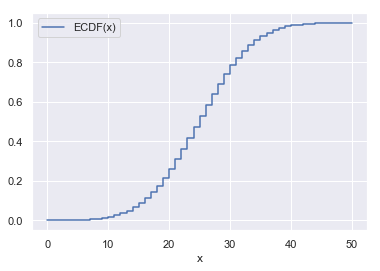

We will show how to compute and plot the ECDF. 

Although the Python library _statsmodels_ provides a function `ECDF()` that can compute the ECDF for you, we present how to compute the ECDF by hand. This way we will get to know and practice with the useful _Pandas_ functions **`value_counts()`** and **`sort_index()`**, and we will get more insight in what the ECDF actually is. Moreover, plotting an ECDF remains somewhat tricky: using the library function provides almost no advantage.

Let us consider a made-up experiment sampling integer numbers between 0 and 10 with outcomes `[5, 3, 5, 7, 1]`.

In [53]:
df_experiment = pd.DataFrame([5, 3, 5, 7, 1], columns=['outcome'])
df_experiment

,outcome
0,5
1,3
2,5
3,7
4,1


To determine the ECDF, we first want to know, for every value appearing in the `'outcome'` column, how often it occurs. For this, we use the _Pandas_ function **`value_counts()`**.

In [54]:
df_experiment['outcome'].value_counts()

5    2
3    1
7    1
1    1
Name: outcome, dtype: int64

The result of `value_counts()` should be interpreted as follows: the value `5` appears `2` times in the `'outcome'` column, the value `7` appears `1` time, as do the values `3` and `1`. We rename this Series to `'counts'`, and convert it to a data frame `df_counts`.

In [55]:
df_counts = pd.DataFrame(df_experiment['outcome'].value_counts().rename('counts'))
df_counts

,counts
5,2
3,1
7,1
1,1


Next, we sort the index of this data frame. This will allow us to compute the ECDF efficiently later on.

In [56]:
df_counts.sort_index(inplace=True)
df_counts

,counts
1,1
3,1
5,2
7,1


The ECDF can now be computed easily. To find the ECDF evaluated in a point $x$, we need two pieces of information
* The number $N_x$ of outcomes smaller than or equal to $x$
* The total number of outcomes $N$

Then $\mathrm{ECDF}(x) = N_x/ N$.
Therefore, the ECDF evaluated at the `index` in the data frame above, is equal to the cumulative sum of the `'counts'` column, divided by $N$.

In [57]:
df_counts['ecdf'] = df_counts['counts'].cumsum() / df_counts['counts'].sum()
df_counts

,counts,ecdf
1,1,0.2
3,1,0.4
5,2,0.8
7,1,1.0


Plotting the ECDF is in fact quite tricky. A graph of an ECDF is a step function, i.e. piecewise flat. To achieve this, we provide the keyword argument `drawstyle ='steps-post'`. 

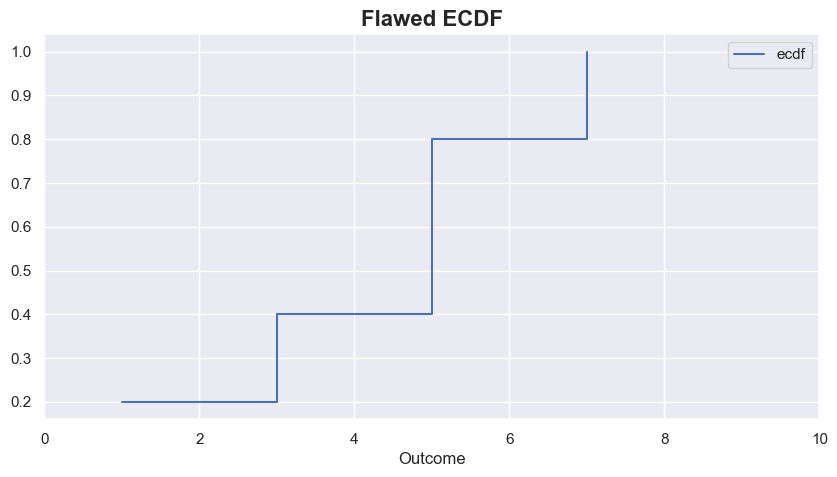

In [58]:
ax = df_counts[['ecdf']].plot(drawstyle='steps-post')
ax.set_xlim(0, 10)
ax.set_xlabel("Outcome")
ax.set_title("Flawed ECDF", size=16, weight='bold');

The graph has a major flaw: it suddenly starts at the smallest recorded outcome, and stops at the largest recorded outcome, even though the ECDF is actually defined on the whole real line. We want to draw the graph for the whole plot range, which for our example above means that we want to plot the ECDF from `x=0` to `x=10`.

To do so, we copy the `'ecdf'` column of the data frame `df_counts` to a data frame `df_ecdf` and add two more $x$-values to the data frame `df_ecdf` together with the corresponding value of the ECDF: 
* one value of $x$ much smaller than the smallest recorded outcome, e.g. $x = -2000$, so the ECDF in that point is $\mathrm{ECDF}(-2000) = 0$. 
* one value of $x$ much larger than the largest recorded outcome, e.g. $x = 2000$, so the ECDF in that point is $\mathrm{ECDF}(2000) = 1$.

> **Note:** The precise values $x=-2000$ and $x=2000$ are not important. For the plotting it only matters that the first value is smaller than the left boundary of the plot, and the second is larger than the right boundary. We choose our values _much_ smaller and _much_ larger respectively, so that we don't have to change the values if we change our mind about our desired plot range.

In [59]:
df_ecdf = df_counts[['ecdf']].copy()
df_ecdf.loc[-2000, 'ecdf'] = 0
df_ecdf.loc[2000, 'ecdf'] = 1
df_ecdf

,ecdf
1,0.2
3,0.4
5,0.8
7,1.0
-2000,0.0
2000,1.0


We sort once more the data frame by the index.

In [60]:
df_ecdf.sort_index(inplace=True)
df_ecdf

,ecdf
-2000,0.0
1,0.2
3,0.4
5,0.8
7,1.0
2000,1.0


Now we are finally ready to plot the ECDF. 

In [112]:
ax = df_ecdf['ecdf'].plot(drawstyle='steps-post')
ax.set_xlim(0, 10)
ax.set_xlabel("Outcome")
ax.set_title("ECDF", size=16, weight='bold');

-2000    0.0
 1       0.2
 3       0.4
 5       0.8
 7       1.0
 2000    1.0
Name: ecdf, dtype: float64

### Exercises: Compare ECDFs for Mouse a Trackpad Trajectories

To get more insight into the differences in total times needed to reach a target by using a mouse vs. a trackpad, we aim to plot both the ECDF for the total times for the *mouse* trajectories and the ECDF for the *trackpad* trajectories in one figure. This is a rather big task, so we split it up in several exercises for the mouse trajectories. Afterwards, you can apply the same steps for the trackpad trajectories.

#### Exercise 3.a

Use the data frame `df_user_trial_props` to create a data frame `df_mouse`. The data frame `df_mouse` should contain only one column, labeled `'total_time'`, with the total time for each trajectory that was recorded with a **mouse**.

In [67]:
#// BEGIN_TODO [DAS_3a] Total times mouse trajectories (1 point)

df_mouse = df_user_trial_props[df_user_trial_props['input_method'] == 'mouse'][['total_time']]

#// END_TODO [DAS_3a]

df_mouse.head()

total_time
user trial            
1226 20       1.045089
     21       1.078394
     22       1.866229
     23       0.959770
     24       1.022803

#### Exercise 3.b

Create a data frame `df_mouse_counts` indexed by all total times occurring in the data frame `df_mouse`. The data frame `df_mouse_counts` should contain one column, labeled `'counts'`, which contains how often that total time occurs in `df_mouse`. Make sure that the indices are sorted.

In [71]:
#// BEGIN_TODO [DAS_3b] Count occurences total times (1 point)

df_mouse_counts = pd.DataFrame(df_mouse.value_counts().rename('counts'))
df_mouse_counts.sort_index(inplace=True)

#// END_TODO [DAS_3b]

df_mouse_counts.head()

,counts
total_time,
0.517859,1
0.546003,1
0.581902,1
0.593452,1
0.607618,1


#### Exercise 3.c

Add a column labeled `'ecdf'` to the data frame `df_mouse_counts`, containing the value of the ECDF evaluated at the time in the index.

In [72]:
#// BEGIN_TODO [DAS_3c] Add column with ECDF (1 point)

df_mouse_counts['ecdf'] = df_mouse_counts['counts'].cumsum() / df_mouse_counts['counts'].sum()

#// END_TODO [DAS_3c]

df_mouse_counts.head()

,counts,ecdf
total_time,,
0.517859,1,0.000061
0.546003,1,0.000121
0.581902,1,0.000182
0.593452,1,0.000242
0.607618,1,0.000303


#### Exercise 3.d

Copy the `'ecdf'` column of the data frame `df_mouse_counts` to a new data frame `df_mouse_ecdf`. Add two appropriate new values of the ECDF to this data frame, one at a very large negative time, and one at a very large positive time, let's say at time $-2000$ s and $2000$ s. Make sure that the index of the data frame is sorted.

In [84]:
#// BEGIN_TODO [DAS_3d] Add new values to ECDF data frame (1 point)

df_mouse_ecdf = df_mouse_counts[['ecdf']].copy()
df_mouse_ecdf.loc[-2000, 'ecdf'] = 0
df_mouse_ecdf.loc[2000, 'ecdf'] = 1
df_mouse_ecdf.sort_index(inplace = True)

#// END_TODO [DAS_3d]

df_mouse_ecdf.head()

,ecdf
total_time,
-2000.000000,0.000000
0.517859,0.000061
0.546003,0.000121
0.581902,0.000182
0.593452,0.000242


> **Note:** When you are working towards a goal (such as plotting an ECDF) and you need to make multiple steps, it is good to regularly display some intermediate results to see whether everything looks as expected. Exactly for this reason, we have called the `head()` function at the end of each code cell. However, after this exercise, we would also like to know whether the value of the ECDF at time $2000$ s is inserted correctly.

#### Exercise 3.e

Display the last five rows of the data frame `df_mouse_ecdf`. 

> **Hint:** Just like the function `head()` displays the first five rows of a data frame, the function `tail()` displays the last five rows.

In [74]:
#// BEGIN_TODO [DAS_3e] Display last five rows ECDF data frame (1 point)

df_mouse_ecdf.tail()

#// END_TODO [DAS_3e]

,ecdf
total_time,
53.499519,0.999818
65.155427,0.999879
76.857272,0.999939
131.273690,1.000000
2000.000000,1.000000


Does everything look okay? Then let's execute the same steps for the trackpad trials.

#### Exercise 3.f
    
Create a data frame `df_trackpad_ecdf` indexed by all total times occurring in **trackpad** trajectories, an additional very large negative time and a very large positive time, and with a column `'ecdf'` containing the value of the ECDF at these times. We advise you to use multiple code cells (between the marker lines) and regularly display output to check whether everything looks as expected.

In [108]:
#// BEGIN_TODO [DAS_3f] Create ECDF for trackpkad trajectories (2 points)

df_trackpad_ecdf = pd.DataFrame(df_user_trial_props[df_user_trial_props['input_method'] == 'trackpad'][['total_time']].value_counts().rename('counts'))
df_trackpad_ecdf['ecdf'] = df_trackpad_ecdf['counts'].cumsum() / df_trackpad_ecdf['counts'].sum()
df_trackpad_ecdf.loc[-2000, 'ecdf'] = 0
df_trackpad_ecdf.loc[2000, 'ecdf'] = 1
df_trackpad_ecdf.sort_index(inplace=True)

df_trackpad_ecdf.tail(1000)


,counts,ecdf
total_time,,
2.499602,1.0,0.352812
2.501062,1.0,0.352871
2.501395,1.0,0.352931
2.501893,1.0,0.352990
2.502411,1.0,0.353050
...,...,...
43.645696,1.0,0.333849
93.429604,1.0,0.333908
95.683816,1.0,0.333967


In [83]:
#// END_TODO [DAS_3f]

df_trackpad_ecdf.head()

,counts,ecdf
total_time,,
-2000.000000,NaN,0.000000
0.631266,1.0,0.000059
0.635076,1.0,0.250089
0.656173,1.0,0.666330
0.667644,1.0,0.666389


Time to see the results... 

#### Exercise 3.g

Plot in one figure:

* the ECDF of the total time used for the **mouse** trials
* the ECDF of the total time used for the **trackpad** trials

Make sure the $x$-axis runs from $0$ to $4$ (s), and include a legend explaining which graph corresponds to the mouse, and which corresponds to the trackpad.

> <span class="t">**Hint<span class="c">:**</span></span>
<span class="h">
Use the data frames `df_mouse_ecdf` and `df_trackpad_ecdf` defined above.
</span>

In [110]:
#// BEGIN_TODO [DAS_3g] Plot ECDFs (1 point)

df_trackpad_ecdf['ecdf']

# fig, ax = plt.subplots(ncols=1, nrows=2)
# df_mouse_ecdf['ecdf'].plot(drawstyle='steps-post', ax=ax[0])
# df_trackpad_ecdf['ecdf'].plot(drawstyle='steps-post', ax=ax[1])
# ax[1].set_xlim(0, 4)
# ax[1].set_xlabel('outcome')
# plt.suptitle('ECDF', fontsize=14, weight='bold');

#// END_TODO [DAS_3g]

total_time  
-2000.000000    0.000000
 0.631266       0.000059
 0.635076       0.250089
 0.656173       0.666330
 0.667644       0.666389
                  ...   
 43.645696      0.333849
 93.429604      0.333908
 95.683816      0.333967
 557.068536     1.000000
 2000.000000    1.000000
Name: ecdf, Length: 16824, dtype: float64

What do these ECDFs tell us about the distribution of the total times for the mouse trials versus the trackpad trials?

## 4. Exercise: Find Ballistic Motion


In the earlier exercises you were closely guided. In the following exercises we will put your knowledge to the test.

Note that these exercises may seem more difficult as you will need to work more indepedently. When you struggle with an exercise then go back to the corresponding earlier section and make sure you really understand the introduced concepts. Do not hesitate to experiment with your own code!


In this exercise, we will use the data in `'datasets/path.csv'`, loaded into the data frame `df_path`:

In [ ]:
df_path = pd.read_csv('datasets/path.csv')
df_path.head()

It contains several features that were derived from the raw data of a single mouse trajectory, similar to what was done in the exercises in Section 1. The `'filt_x'` and `'filt_y'` columns contain the approximate $x$- and  $y$-coordinates computed by applying a Gaussian filter to the raw coordinates, and the  `'approximate_speed'` column contains the approximate speed (in pixels per ms) computed by applying a Gaussian filter of order 1 to the path length.

In this exercise we will extract one more feature: we are going to extract the _ballistic part_ of the mouse trajectory. This is quite challenging, so do not hesitate to ask your tutor for hints.

The ballistic part of the motion is the motion restricted to a certain time-interval (from `i_left` to `i_right`) around the time `i_max` at which the speed is maximal, as illustrated by the following picture.

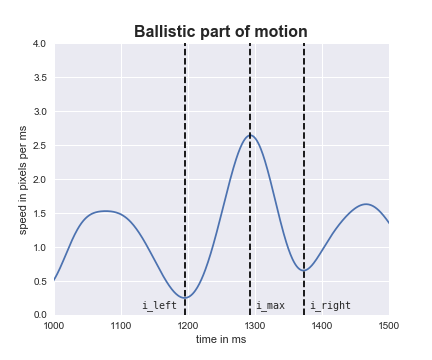

Here is a picture of the corresponding path, where the ballistic part of the motion is indicated in black.

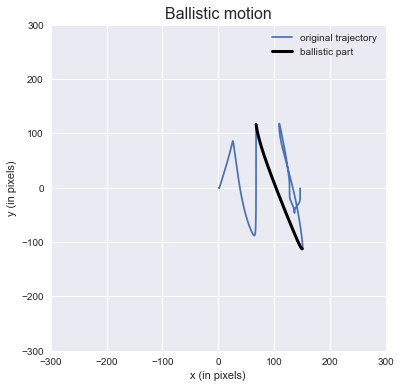

We want to use _Pandas_ to extract this ballistic part of the trajectory. For that, we need a _very precise definition_. The precise definition of the _ballistic_ part of the mouse trajectory is as follows: we first find the index `i_max` for which the (approximate) _speed_ is maximal (if there are multiple such indices, we take the smallest). Then, we define the range of indices from `i_left` to `i_right` as the largest range of indices containing `i_max` such that the speed is _increasing_ from `i_left` to `i_max` and _decreasing_ from `i_max` to `i_right`. The _ballistic_ part of the mouse trajectory is defined as the mouse trajectory restricted to the range from `i_left` to `i_right`.

In other words, `i_left` is the smallest index such that for every index `i` between `i_left`  and `i_max` the approximate speed at `i` is _larger than or equal to_ the approximate speed at `i-1`. Similarly, `i_right` is the largest index such that for every `i` between `i_max + 1` and `i_right`, the approximate speed at `i` is _smaller than or equal to_ the approximate speed at `i-1`.

Our goal will be to find `i_left` and `i_right` for the trajectory in `df_path`. We will afterwards define the data frame `df_ballistic` as `df_path[i_left:i_right]`.

### Exercise 4.a

Find the index in `df_path` for which the `'approximate_speed'` is maximal. Assign your answer to the variable `i_max`.

In [ ]:
#// BEGIN_TODO [DAS_4a] Find i_max (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [DAS_4a]

df_path[i_max - 2 : i_max + 3]

In the above data frame slice, the approximate speed should be maximal for the row in the middle, with index equal to `i_max`:

In [ ]:
i_max

### Exercise 4.b

Add a column labeled `'speed_diff'` to the data frame `df_path`, containing in every row the difference between the approximate speed in that row and the approximate speed in the previous row.

> **Note:** The first entry of this column should be `NaN` (as there is no previous speed).

In [ ]:
#// BEGIN_TODO [DAS_4b] Add speed_diff (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [DAS_4b]

df_path.head()

### Exercise 4.c

Find `i_left`, the smallest index in `df_path` such that for every index `i` between `i_left` and `i_max` (i.e. `i_left` $\leq$ `i` $\leq$ `i_max`) the approximate speed at `i` is _larger than or equal to_ the approximate speed at `i-1`.

> <span class="t">**Hint<span class="c">:**</span></span>
<span class="h">
Note that a trajectory consists of alternating chunks for which the approximate speed at `i` is _larger than or equal to_ the approximate speed at `i-1`, and those for which its opposite holds. We can get `i_left` by finding the last chunk for which the opposite holds (i.e. where speed at `i` is _strictly less than_ the speed at `i-1`).
</span>

> <span class="t">**Hint<span class="c">:**</span></span>
<span class="h">
First use slicing and the index `i_max` to make a new data frame `df_first_part` which only contains the rows up to (and including) the index `i_max`. Next, use the column `'speed_diff'` created before to select only those rows `i` for which the speed at `i` is *strictly less than* the speed at `i-1`. You can use this last data frame to find out what `i_left` should be.
</span>

In [ ]:
#// BEGIN_TODO [DAS_4c] Find i_left (1 point)

# ===== =====> Replace this line by your code. <===== ===== #


In [ ]:
#// END_TODO [DAS_4c]

i_left

The following code cell can give you a quick (although not a full) check of your work. If everything worked out, the value in the column `'speed_diff'` should be less than zero in the first row, and larger than or equal to zero in the other rows.

In [ ]:
df_path.loc[i_left - 1 : i_left + 3]

Note that an interval `.loc[a:b]` includes both `a` and `b`.

### Exercise 4.d

Find `i_right`, the largest index such that for every index `i` between `i_max + 1` and `i_right` (`i_max + 1` $\leq$ `i` $\leq$ `i_right`) the approximate speed at `i` is _smaller than or equal to_ the approximate speed at `i-1`.

In [ ]:
#// BEGIN_TODO [DAS_4d] Find i_right (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [DAS_4d]

i_right

The next code cell can give you a quick (although not a full) check of your work. If everything worked out, the value in the column `'speed_diff'` should be larger than zero in the last row, and less than or equal to zero in the other rows.

In [ ]:
df_path.loc[i_right - 3 : i_right + 1]

Now we are ready to define `df_ballistic`:

In [ ]:
df_ballistic = df_path.loc[i_left:i_right]
df_ballistic.head()

In [ ]:
df_ballistic.tail()

### Exercise 4.e

Plot the full, filtered, mouse trajectory (with coordinates `'filt_x'` and `'filt_y'`) in `df_path` in blue, and on top of it indicate the ballistic motion with a thick, black curve (set the linewidth equal to `3`). As before, make sure that both axes range from -300 to 300.

In [ ]:
#// BEGIN_TODO [DAS_4e] Plot ballistic motion (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [DAS_4e]

# Feedback

Please fill in this questionaire to help us improve this course for the next year. Your feedback will be anonymized and will not affect your grade in any way!

### How many hours did you spend on these Exercises?

Assign a number to `feedback_time`.

In [ ]:
#// BEGIN_FEEDBACK [Feedback_1] (0 point)

#// END_FEEDBACK [Feedback_1] (0 point)

import numbers
assert isinstance(feedback_time, numbers.Number), "Please assign a number to feedback_time"
feedback_time

### How difficult did you find these Exercises?

Assign an integer to `feedback_difficulty`, on a scale 0 - 10, with 0 being very easy, 5 being just right, and 10 being very difficult.

In [ ]:
#// BEGIN_FEEDBACK [Feedback_2] (0 point)

#// END_FEEDBACK [Feedback_2] (0 point)

import numbers
assert isinstance(feedback_difficulty, numbers.Number), "Please assign a number to feedback_difficulty"
feedback_difficulty

### (Optional) What did you like?

Assign a string to `feedback_like`.

In [ ]:
#// BEGIN_FEEDBACK [Feedback_3] (0 point)

#// END_FEEDBACK [Feedback_3] (0 point)

### (Optional) What can be improved?

Assign a string to `feedback_improve`. Please be specific, so that we can act on your feedback. For example, mention the specific exercises and what was unclear.

In [ ]:
#// BEGIN_FEEDBACK [Feedback_4] (0 point)

#// END_FEEDBACK [Feedback_4] (0 point)




## How to Submit Your Work

1. **Before submitting**, you must run your notebook by doing **Kernel > Restart & Run All**.  
   Make sure that your notebook runs without errors **in linear order**.
1. Remember to rename the notebook, replacing `...-template.ipynb` with `...-yourIDnr.ipynb`, where `yourIDnr` is your TU/e identification number.
1. Submit the executed notebook with your work
   for the appropriate assignment in **Canvas**.
1. In the **Momotor** tab in Canvas,
  you can select that assignment again to find some feedback on your submitted work.
  If there are any problems reported by _Momotor_,
  then you need to fix those,
  and **resubmit the fixed notebook**.

In case of a high workload on our server
(because many students submit close to the deadline),
it may take longer to receive the feedback.




---

In [ ]:
# List all defined names
%whos

---

# (End of Notebook) <span class="tocSkip"></span>

&copy; 2017-2023 - **TU/e** - Eindhoven University of Technology